# Libraries

In [1]:
import numpy as np
import matplotlib.colors as colors
import scipy as sp 
import matplotlib.pyplot as plt
import scipy.constants as cons

# Numpy

### Provides objects for fast operations on arrays such as mathematical operations

### https://numpy.org/doc/stable/user/whatisnumpy.html

In [11]:
# creating a numpy array
x = np.array([1,2,3,4,5,6])

In [12]:
# check data type
x

array([1, 2, 3, 4, 5, 6])

In [17]:
# math operations on arrays
x_squared = x**2
sin_of_x = np.sin(x)
cos_of_x = np.cos(x)
exp_of_x = np.exp(x)

print("x^2 = {}".format(x))
print("sin(x) = {}".format(sin_of_x))
print("cos(x) = {}".format(cos_of_x))
print("e^(x) = {}".format(exp_of_x))

x^2 = [1 2 3 4 5 6]
sin(x) = [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155 ]
cos(x) = [ 0.54030231 -0.41614684 -0.9899925  -0.65364362  0.28366219  0.96017029]
e^(x) = [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591
 403.42879349]


## Creating arrays of discritize data points

* np.linspace(stop,end,number of steps) 
* np.arange(start,end,step size)

In [ ]:
# always good to check documentation, this is done by adding a ? to the end of the function

np.arange?

In [61]:
# Using linspace
x1 = np.linspace(0,1,5)
x1

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [84]:
# Using arange
x2 = np.arange(-2*np.pi,2*np.pi,0.1)

In [85]:
# applying mathematical operations to arrays
cos_of_x2 = np.cos(x2)
sin_of_x2 = np.sin(x2)

### indexing

* python starts its index at 0

In [79]:
# what is cos(-2*pi)
cos_of_x2[0]

np.float64(1.0)

In [81]:
# what is cos(2*pi), index the last value 
cos_of_x2[-1]

np.float64(0.9977982791785778)

# Visualizing data 

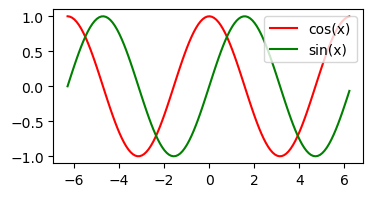

In [77]:
# set figure size
fig_width = 4 
fig_height = 2  
# create figure object
fig, ax = plt.subplots(1,1,figsize=(fig_width, fig_height))
ax.plot(x2,cos_of_x2,color="red", label="cos(x)")
ax.plot(x2,sin_of_x2,color="green", label="sin(x)")
ax.legend()

# Creating your own functions

In [174]:
def f(x):
    return (4/(3*np.pi))*np.sin(3*x) + (4/(5*np.pi))*np.cos(5*x)

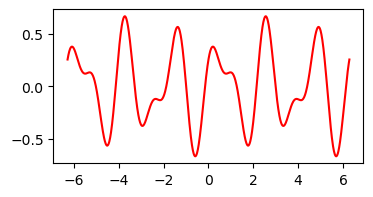

In [176]:
x = np.linspace(-2*np.pi,2*np.pi,1000)
# call the function
y = f(x)

# set figure size
fig_width = 4 
fig_height = 2  
# create figure object
fig, ax = plt.subplots(1,1,figsize=(fig_width, fig_height))
ax.plot(x,y,color="red")

# Derivatives

Definitions of a derivatives for a continuous function.

$ f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h} $

$ f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h} $

$ f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h} $

## Numerical approach

Forward differences
$ f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n} $

Backward differences
$ f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}} $

Central differences
$ f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}} $

### Our test function

$$\frac{4}{3 \pi} Sin(3x) + \frac{4}{5 \pi} Cos(5x)  $$

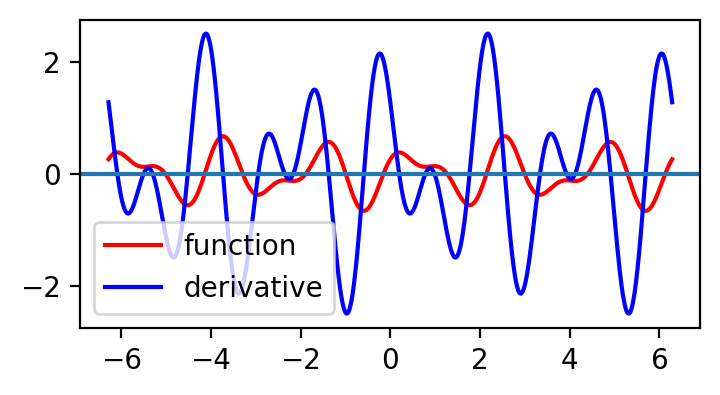

In [177]:
# our function is a bit complicated but can be solved
analytical_sol = (4/np.pi)*(np.cos(3*x) - np.sin(5*x))

# set figure size
fig_width = 4 
fig_height = 2  
# create figure object
fig, ax = plt.subplots(1,1,figsize=(fig_width, fig_height),dpi=200)
ax.plot(x,y,color="red",label ="function")
ax.plot(x,analytical_sol,color="blue",label ="derivative")
ax.axhline(y=0)
ax.legend()

$ f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n} $

* $x_n$ = x
* $x_{n+1}$ = x+h


In [204]:
h = 0.1 
# forward difference method
forward_d = (f(x + h) - f(x)) / h 

Backward differences
$ f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}} $

* $x_n$ = x
* $x_{n-1}$ = x+h

In [205]:
# backward difference method
backward_d = (f(x) - f(x-h)) / h 

Central differences
$ f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}} $

* $x_n$ = x
* $x_{n+1}$ = x+h
* $x_{n-1}$ = x+h

In [206]:
central_d = (f(x + h) - f(x-h)) / (2* h) 

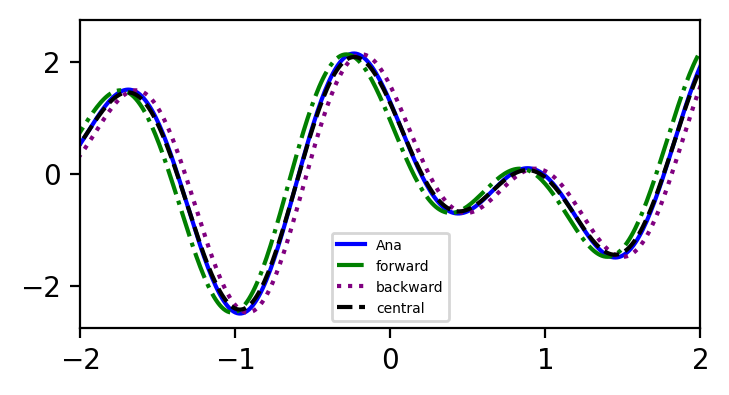

In [213]:
# set figure size
fig_width = 4 
fig_height = 2  
# create figure object
fig, ax = plt.subplots(1,1,figsize=(fig_width, fig_height),dpi=200)
ax.plot(x,analytical_sol,color="blue",label ="Ana")
ax.plot(x,forward_d,color="green",label ="forward",linestyle="dashdot")
ax.plot(x,backward_d,color="purple",label ="backward",linestyle="dotted")
ax.plot(x,central_d,color="black",label ="central",linestyle="--")
ax.set_xlim(-2,2)
ax.legend(fontsize=5)

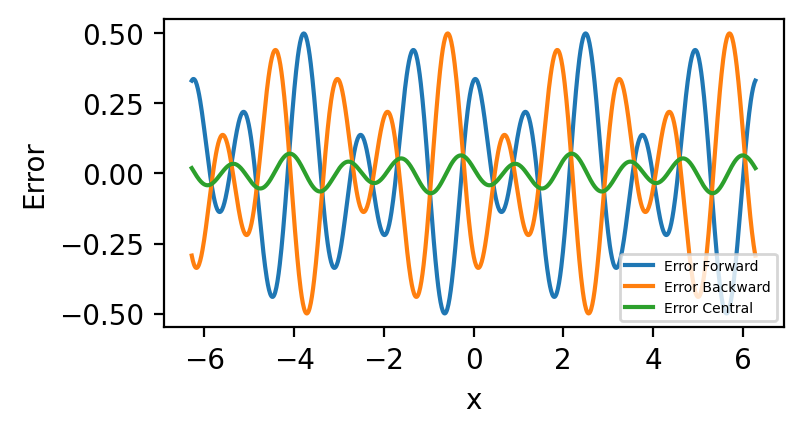

In [212]:
# set figure size
fig_width = 4 
fig_height = 2  
# create figure object
fig, ax = plt.subplots(1,1,figsize=(fig_width, fig_height),dpi=200)
ax.plot(x,analytical_sol - forward_d,  label = "Error Forward")
ax.plot(x,analytical_sol - backward_d,  label = "Error Backward")
ax.plot(x,analytical_sol - central_d,  label = "Error Central")
ax.set_xlabel('x')
ax.set_ylabel('Error')
ax.legend(fontsize=5)

# Multidimensional Arrays

In [230]:
arr1 = np.array([[3,1,0], [-2,-4,3],[5,4,-2]])
arr1

array([[ 3,  1,  0],
       [-2, -4,  3],
       [ 5,  4, -2]])

In [231]:
np.shape(arr1)

(3, 3)

### Transpose

In [232]:
arr1_trans = arr1.T
arr1_trans

array([[ 3, -2,  5],
       [ 1, -4,  4],
       [ 0,  3, -2]])

In [233]:
np.shape(arr1_trans)

(3, 3)

### Indexing

In [234]:
# First row 
arr1_first_row = arr1[0]
arr1_first_row

array([3, 1, 0])

In [235]:
# first index
arr1_first_index= arr1[0][0]
arr1_first_index

np.int64(3)

In [236]:
arr1_first_column= arr1_trans[0]
arr1_first_column

array([ 3, -2,  5])

### Linear algebra

In [237]:
det = np.linalg.det(arr1)
det

np.float64(-1.0000000000000013)

# Gradient, Divergence & Curl

consider a multidimensional function 

$ f(x,y,z) $

or it is a function that has multiple dimensions itself

$ \vec{g}(x,y,z)=\begin{pmatrix}g_x(x,y,z)\\g_y(x,y,z)\\g_z(x,y,z)\end{pmatrix}$

With the nabla operator $\nabla = \begin{pmatrix}\frac{\partial}{\partial x}\\\frac{\partial}{\partial y}\\\frac{\partial}{\partial z}\end{pmatrix}$ we can calculate:

- gradient $ \nabla f(x,y,z) = \begin{pmatrix}\frac{\partial}{\partial x}f(x,y,z)\\\frac{\partial}{\partial y}f(x,y,z)\\\frac{\partial}{\partial z}f(x,y,z)\end{pmatrix}$

- curl $\nabla\times \vec{g}(x,y,z) = \begin{pmatrix}
\frac{\partial}{\partial y}g_z(x,y,z) - \frac{\partial}{\partial z}g_y(x,y,z)\\
\frac{\partial}{\partial z}g_x(x,y,z) - \frac{\partial}{\partial x}g_z(x,y,z)\\
\frac{\partial}{\partial x}g_y(x,y,z) - \frac{\partial}{\partial y}g_x(x,y,z)\\
\end{pmatrix}$

- divergence $\nabla\cdot \vec{g}(x,y,z) = \frac{\partial}{\partial x}g_x(x,y,z)+\frac{\partial}{\partial y}g_y(x,y,z)+\frac{\partial}{\partial z}g_z(x,y,z)$

### Examples

$$
\vec{g}(\vec{r})=\frac{\vec{r}}{r}=\begin{pmatrix}x/\sqrt{x^2+y^2+z^2}\\y/\sqrt{x^2+y^2+z^2}\\z/\sqrt{x^2+y^2+z^2}\end{pmatrix}
$$

In [274]:
# define function
def g(r):
    norm = np.linalg.norm(r, axis=0)
    norm[norm == 0] = np.nan  # avoid division by zero
    return r / norm

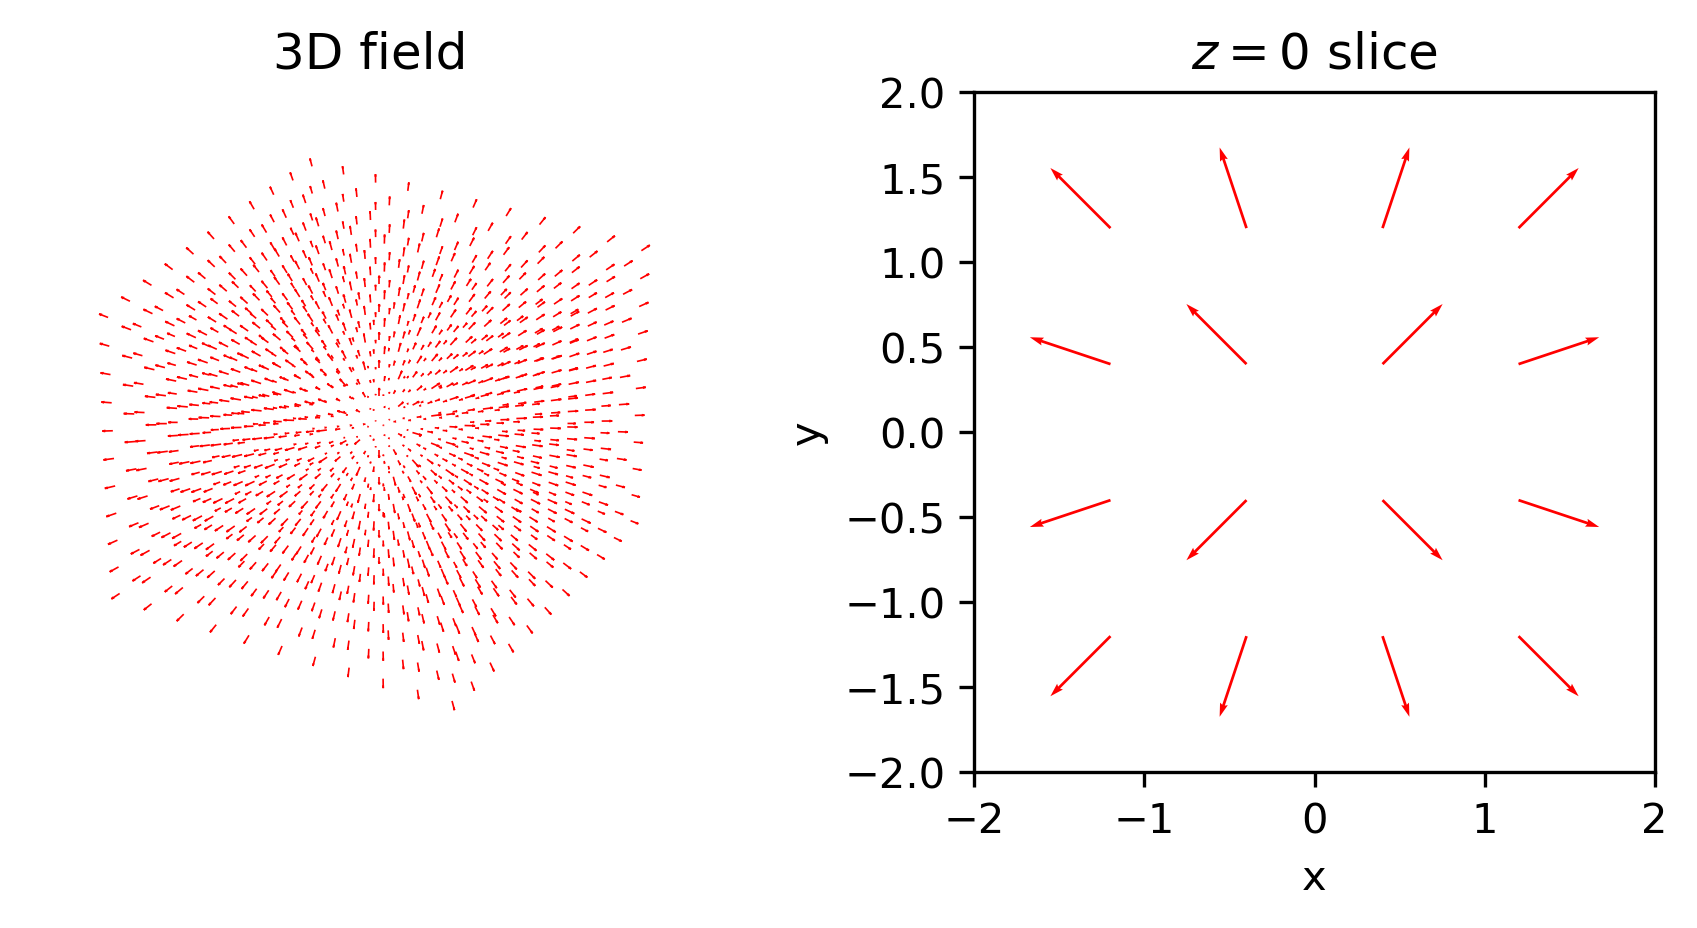

In [301]:
# create mesh grid
x, y, z = np.meshgrid(
    np.linspace(-2, 2, 11),
    np.linspace(-2, 2, 11),
    np.linspace(-2, 2, 11),
    indexing="ij"
)

r = np.array([x, y, z])
values = g(r)

# ---- figure with 2 subplots (side by side) ----
fig = plt.figure(figsize=(6, 3), dpi=300)

# =======================
# Left: 3D vector field
# =======================
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.axis(False)

scale = 7
ax1.quiver(
    x, y, z,
    values[0] * scale,
    values[1] * scale,
    values[2] * scale,
    length=0.11,
    normalize=True,
    color="red",
    linewidth=0.4
)

ax1.view_init(elev=30, azim=-60)
ax1.set_title("3D field")

# =======================
# Right: z = 0 slice
# =======================
ax2 = fig.add_subplot(1, 2, 2)

iz = np.argmin(np.abs(z[0, 0, :]))  # z = 0 slice

X = x[:, :, iz]
Y = y[:, :, iz]

Ux = values[0][:, :, iz]
Uy = values[1][:, :, iz]

step = 2

ax2.quiver(
    X[::step, ::step],
    Y[::step, ::step],
    Ux[::step, ::step],
    Uy[::step, ::step],
    angles="xy",
    scale_units="xy",
    scale=2,
    width=0.004,
    color="red"
)



ax2.set_aspect("equal")
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_title(r"$z=0$ slice")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.show()

In [305]:
def divergence(g,r,h):
    x,y,z = r
    dgxdx = ( g(np.array([x + h,y,z]))[0] - g(np.array([x - h,y,z]))[0]  ) / (2*h)
    dgydy = ( g(np.array([x,y + h,z]))[1] - g(np.array([x,y - h,z]))[1]  ) / (2*h)
    dgzdz = ( g(np.array([x,y,z + h]))[2] - g(np.array([x,y,z - h]))[2]  ) / (2*h)

    return dgxdx + dgydy + dgzdz

In [323]:
# create mesh grid
x, y, z = np.meshgrid(
    np.linspace(-2, 2, 100),
    np.linspace(-2, 2, 100),
    np.linspace(-2, 2, 100),
    indexing="ij"
)
r = np.array([x, y, z])
h = 0.0001
iz = np.argmin(np.abs(z[0, 0, :]))  # z = 0 slice
X = x[:, :, iz]
Y = y[:, :, iz]
div_r = divergence(g,r,h)

In [324]:
np.shape(div_r)

(100, 100, 100)

(-1.0, 1.0)

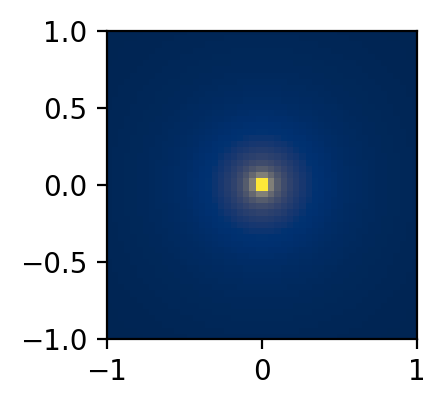

In [339]:
# set figure size
fig_width = 2
fig_height = 2  
# create figure object
fig, ax = plt.subplots(1,1,figsize=(fig_width, fig_height),dpi=200)
ax.pcolormesh(X,Y,div_r[:,:,iz],cmap="cividis")
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)